In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [38]:
M_e = 0.511  # mass of the electron in MeV 
E_o = 3.508 + M_e  # endpoint energy for He-6 in MeV
slices= 200 # is the number of channels in the spectrum
E_e = np.linspace(M_e, E_o, slices)  # is a range of the emitted electron's energy 

In [39]:
"""Defining the dN/dE function"""
def my_function(E_e): 
    p_e=np.sqrt((E_e*E_e)-(M_e*M_e)) #p_e is the momentum of the energy 
    diff=(E_o-E_e)**2
    count_per_electron = p_e*E_e*diff
    return count_per_electron

In [40]:
gamma=E_e/M_e

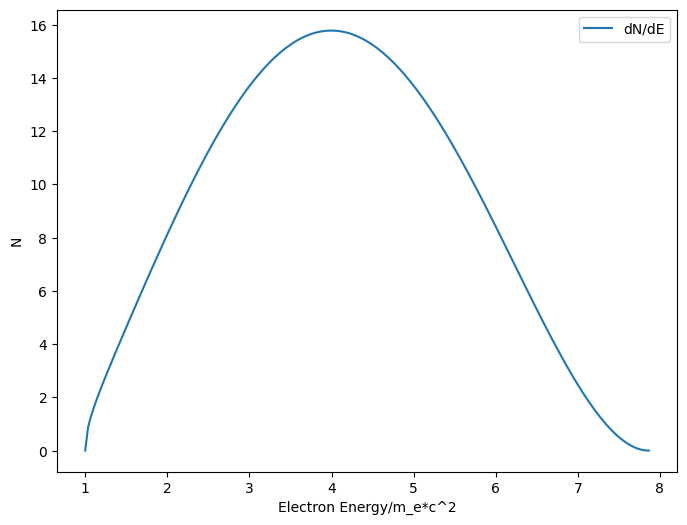

In [41]:
# Calculate dN/dE values using my_function as defined above
"""Defining the number of counts that is in the spectrum"""
number_of_counts=1e3 
dN_dE = my_function(E_e)
#print(len(dN_dE))
#print(len(E_e))
plt.figure(figsize=(8, 6))
plt.plot(gamma, dN_dE, label='dN/dE')
#plt.fill_between(gamma, norm, alpha=0.2,label='Area under the curve' )
plt.xlabel('Electron Energy/m_e*c^2')
plt.ylabel('N')
plt.legend()  
plt.show()

**Method #1 of finding the area under the curve**


In [42]:
area_under_curve = np.trapz(dN_dE, gamma)
print('Method #1')
print("Approximate area under the curve:", area_under_curve)

Method #1
Approximate area under the curve: 63.20001218900869


In [43]:
"""Finding the area under the curve"""
print(area_under_curve)
norm = (1/area_under_curve)*number_of_counts*dN_dE

#print(norm)
#print(gamma)

63.20001218900869


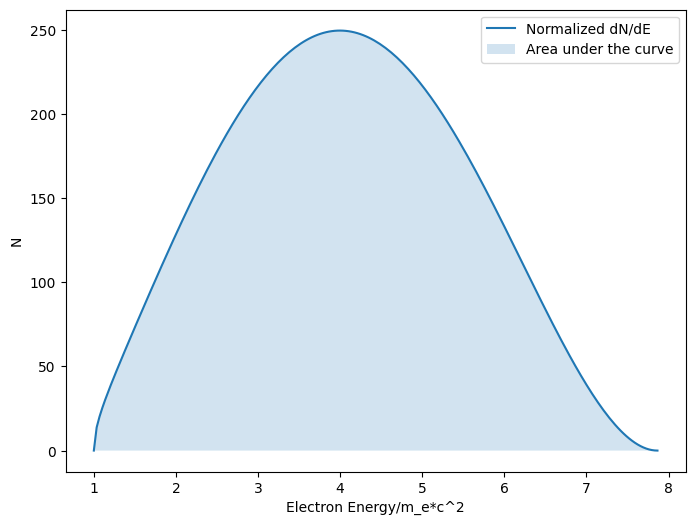

In [44]:
plt.figure(figsize=(8, 6))
plt.plot(gamma, norm, label='Normalized dN/dE')
plt.fill_between(gamma, norm, alpha=0.2,label='Area under the curve' )
plt.xlabel('Electron Energy/m_e*c^2')
plt.ylabel('N')
plt.legend()  
plt.show()

In [45]:
area_under_norm = np.trapz(norm, gamma)
print('area_under_norm=', area_under_norm)

area_under_norm= 999.9999999999998


In [46]:
gamma_min=min(gamma) # maxiumum energy of the beta spectrum 
gamma_max=max(gamma) # minimun energy of the beta spectrum 
 # defining how fine the slices should be 
bin_size = (gamma_max-gamma_min)/slices # calculating the step size
gamma=gamma_min+0.0001
gamma_i = []
N_i = []
error_vals=[]
original_N=[]
f1_arr=[]
f2_arr=[]
X_o = E_o/M_e

In [47]:
b=1e-15
def func_1(pe, Xi, Xo):
    f_1 = p_e * X_i * (X_o -X_i)**2
    return f_1

def func_2(f_1, Xi):
    f_2 = f_1/X_i
    return f_2

In [48]:

sum_a_11=0
sum_a_12=0
sum_b_11=0
sum_b_12=0
while gamma <= gamma_max:
    #print(x)
    E=M_e*gamma 
    #original_func=number_of_counts*my_function(E)
    #N_value=(1/area_under_curve)*(number_of_counts)*my_function(E)
    N_value=(((number_of_counts)*(1/area_under_curve)*my_function(E)))
    #print(N_value)
    N_std_dev=np.sqrt(N_value)
    #print(N_std_dev)
    mean_N=abs(np.random.normal(N_value,N_std_dev))
    #print(mean_N)
    error_N=np.sqrt(mean_N)
    #print(mean_N, error_N)
    X_i= gamma
    p_e = np.sqrt(X_i**(2)-1)
    f_1=func_1(p_e, X_i, X_o)
    f_2=func_2(f_1,X_i)
    sigma= error_N
    #print(mean_N, error_N)
    a_11 = (f_1/sigma)**2
    #print(f_1)
    if sigma != 0:
        sigma = error_N
    else:
        a_11 = 0
        
    a_12 = ((f_1*f_2)/(sigma)**2)
    b_11 = ((f_2*f_1)/(sigma)**2)
    b_12 = ((f_2*f_2)/(sigma)**2)
    sum_a_11 = sum_a_11 + a_11
    sum_a_12 = sum_a_12 + a_12
    sum_b_11 = sum_b_11 + b_11
    sum_b_12 = sum_b_12 + b_12
    c_11 = sum_a_11 + b * sum_b_11
    c_12 = sum_a_12 + b * sum_b_12
    gamma_i.append(gamma)
    N_i.append(mean_N)
    error_vals.append(error_N)
    #original_N.append(original_func)
    f1_arr.append(f_1)
    f2_arr.append(f_2)
    gamma = gamma + bin_size

A = np.matrix([[sum_a_11, sum_a_12],[sum_b_11, sum_b_12]])
B = np.matrix([[c_11], [c_12]])
A_inverse = np.linalg.inv(A)# we want to find the inverse of A which is A-1
X= A_inverse *B # finding the values of our constants for our fit A and B. 
#print(X[1])
#first=X[0,0]
print('A_value=', X[0,0])
print('B_value=', X[1,0])
normalisation_constant= X[1,0]/X[0,0]
print('b_value=',normalisation_constant)
y_fit = [((f1_val)+(normalisation_constant*f2_val)) for f1_val, f2_val in zip(f1_arr, f2_arr)]
#print(y_fit)
#print(gamma_i)
#area_under_fit = np.trapz(N_i, gamma_i)
#print(area_under_fit)
#print(normalized_fit)
normalized_fit= [((f1_val)+(normalisation_constant*f2_val)) for f1_val, f2_val in zip(f1_arr, f2_arr)]

fit_data=(normalized_fit)
#plt.errorbar(gamma_i,N_i ,yerr=error_vals, fmt='o', capsize=8, color='green', label='fit')
#print(fit_data)
#print("Approximate area under the curve:", area_under_fit)

A_value= 0.9999999999999994
B_value= 2.3566538941995233e-15
b_value= 2.3566538941995245e-15


In [49]:
sum_chi = 0
#print(error_vals)
#residuals=[]
# Assuming fit_data, N_i, and error_vals are lists of lists or arrays
#for fit_dat_list, data_list, sigma_list in zip(fit_data, N_i, error_vals)
residuals=[]
# Assuming you want to calculate chi-squared for each element in the lists
for fit_dat, data, sigma in zip(fit_data, N_i, error_vals):
      chi_squared = ((fit_dat - data) / sigma)**2
      #print(chi_squared)
      sum_chi += chi_squared
      residuals.append((data - fit_dat) / sigma)

      #plt.plot(residuals, marker='o', linestyle='-', color='b', label='Residuals')
print("Total chi-squared per counts:", (sum_chi/(number_of_counts-2)))



Total chi-squared per counts: 0.3450829851544823


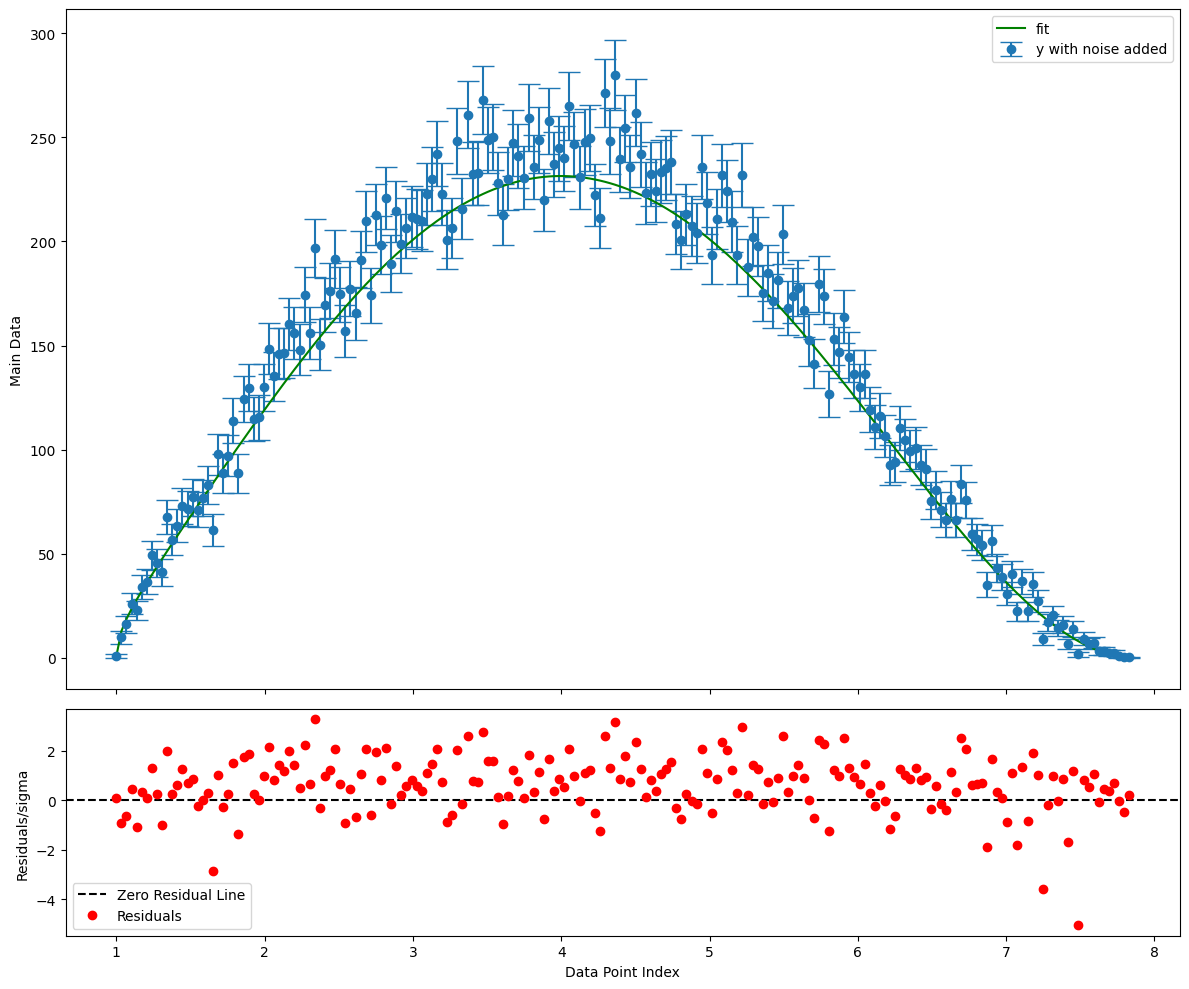

In [50]:
#plt.figure(figsize=(12, 8))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(12, 10))

# Plot main data with error bars and labels
ax1.errorbar(gamma_i, N_i, yerr=error_vals, fmt='o', capsize=8, label='y with noise added')
#ax1.plot(gamma_i, original_N, color='red', label='y without noise added')
ax1.plot(gamma_i, normalized_fit, color='green', label='fit')
ax1.legend()
ax1.set_ylabel('Main Data')

# Plot residuals with a zero line and labels
ax2.errorbar(gamma_i, residuals, fmt='o', capsize=8 ,label='Residuals', color='red')
#ax2.errorbar(gamma_i, residuals, yerr=error_vals, fmt='o', capsize=8 ,label='Residuals', color='red')
ax2.axhline(y=0, color='black', linestyle='--', label='Zero Residual Line')
ax2.legend()
ax2.set_xlabel('Data Point Index')
ax2.set_ylabel('Residuals/sigma')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


We have the simulated data points $y_{i}$:

$$y_{i}(E_{e})=p_{e}E_{e}\left(E_{o}-E_{e}\right)^{2}\left(1+b\frac{m}{E_{e}}\right) \quad \text{(1)}$$

where $E_{e}$ is the kinetic energy of the beta particle (electron), $E_{o}$ is the maximum kinetic energy at which the beta particle is emitted, so here  $E_{o}=E_{e}+mc^{2}$, $p_{e}$ is the momentmum of the electron, $m$ used here is the mass of the electron. The last term is one which shows the Fietz constant, $b$, which is what we are investigating. To obtain this constant we will now perform a $\chi^{2}$-minimization. Before we do that lets do some simplifications before we proceed.  

$$p_{e}=\sqrt{E_{e}^{2}-m^{2}} \quad \text{(2)} $$ 

Now let $$ X_{i} =  E_{e}/m $$ so Eqn 2 becomes $$ p_{e} = \sqrt{X_{i}^{2}-1}$$. Also $E_{o}$ becomes $$X_{o}=E_{o}/m$$

Putting Eqn 1 interms of $X_{i}$ and $X_{o}$: $$ y_{i}(X_{i}) = \sqrt{X_{i}^{2}-1}  X_{i}  \left( X_{o}-X_{i}\right)^{2} \left( 1+ \frac{b}{X_{i}}\right) \quad \text{(3)}$$. Let $$ f_{1}(X_{i})= \sqrt{X_{i}^{2}-1} X_{i} \left( X_{o}-X_{i}\right)^{2} \quad \text{(4)} $$ and $$ f_{2}(X_{i}) = \frac{f_{1}(X_{i})}{X_{i}} \quad \text{(5)} $$. 

Expressing $y_{i}$ interms of $f_{1}(X_{i})$ and $f_{2}(X_{i})$ $$y_{i}=f_{1}(X_{i})+b f_{2}(X_{i})$$  and $$y_{fit}=Af_{1}(X_{i})+Bf_{2}(X_{i})$$ where $b=B/A$

Next step is to find our chi squared minimzation 
$$\chi^{2}= \sum_{i=0}^{n} \left(\frac{y_{fit}(X_{i})-y_{i}(X_{i})}{\sigma_{i}}\right)^{2}$$, since are 2 constants A and B that need to be found we take the derivative of the $\chi^{2}$ with respect to these constants such as 


$$ \frac{\partial \chi^{2}}{\partial A} = 2 \sum_{i=0}^{n} \left(\frac{y_{fit}(X_{i})-y_{i}(X_{i})}{\sigma_{i}}\right)\frac{f_{1}(X_{i})}{\sigma_{i}}=0 $$, similarly for B <br>

$$ \frac{\partial \chi^{2}}{\partial B} = 2 \sum_{i=0}^{n} \left(\frac{y_{fit}(X_{i})-y_{i}(X_{i})}{\sigma_{i}}\right)\frac{f_{2}(X_{i})}{\sigma_{i}}=0 $$ <br>.

This will results in a two by two matrix which can be solved using the gaussian jordan method. 


